In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images/usd/10/Screen Shot 2019-07-31 at 10.50.14 AM.png
/kaggle/input/images/usd/10/Screen Shot 2019-07-31 at 4.42.40 PM.png
/kaggle/input/images/usd/10/Screen Shot 2019-07-31 at 4.41.43 PM.png
/kaggle/input/images/usd/10/Screen Shot 2019-07-31 at 4.41.37 PM.png
/kaggle/input/images/usd/10/537869.jpg
/kaggle/input/images/usd/10/Screen Shot 2019-07-31 at 10.49.53 AM.png
/kaggle/input/images/usd/10/275917423.jpg
/kaggle/input/images/usd/10/Screen Shot 2019-07-31 at 10.49.49 AM.png
/kaggle/input/images/usd/10/Screen Shot 2019-07-31 at 10.42.55 AM.png
/kaggle/input/images/usd/10/Screen Shot 2019-07-31 at 4.41.33 PM.png
/kaggle/input/images/usd/10/Screen Shot 2019-07-31 at 4.41.49 PM.png
/kaggle/input/images/usd/10/Screen Shot 2019-07-31 at 10.50.04 AM.png
/kaggle/input/images/usd/10/Screen Shot 2019-07-31 at 4.42.16 PM.png
/kaggle/input/images/usd/10/Screen Shot 2019-07-31 at 10.49.44 AM.png
/kaggle/input/images/usd/10/275913388.jpg
/kaggle/input/images/usd/10/Screen Shot 201

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import fastai
from fastai.vision import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [4]:
#For CPU only 
fastai.torch_core.defaults.device = 'cpu'
defaults.device= 'cpu'

In [5]:
path=Path('/kaggle/input/')
path_imgs = path/'images' #'/home/jupyter/.fastai/data/banknotes/')
#path_imgs.mkdir(parents=True, exist_ok=True)
path_imgs

PosixPath('/kaggle/input/images')

In [6]:
src = (ImageList.from_folder(path_imgs,recurse=True)
               .split_by_rand_pct(valid_pct=.1))
src

ItemLists;

Train: ImageList (366 items)
Image (3, 500, 433),Image (3, 222, 500),Image (3, 222, 500),Image (3, 333, 500),Image (3, 217, 500)
Path: /kaggle/input/images;

Valid: ImageList (40 items)
Image (3, 281, 500),Image (3, 278, 500),Image (3, 304, 500),Image (3, 214, 500),Image (3, 1301, 1273)
Path: /kaggle/input/images;

Test: None

In [7]:
src.train.items[0]

PosixPath('/kaggle/input/images/usd/10/Screen Shot 2019-07-31 at 10.50.14 AM.png')

In [8]:
#multi class
func=lambda i: (i.parent.relative_to(path_imgs).parts )
func(src.train.items[0])

('usd', '10')

In [9]:
ll = src.label_from_func(func); ll

LabelLists;

Train: LabelList (366 items)
x: ImageList
Image (3, 500, 433),Image (3, 222, 500),Image (3, 222, 500),Image (3, 333, 500),Image (3, 217, 500)
y: MultiCategoryList
usd;10,usd;10,usd;10,usd;10,usd;10
Path: /kaggle/input/images;

Valid: LabelList (40 items)
x: ImageList
Image (3, 281, 500),Image (3, 278, 500),Image (3, 304, 500),Image (3, 214, 500),Image (3, 1301, 1273)
y: MultiCategoryList
euro;200,euro;100,usd;20,usd;100,inr;500
Path: /kaggle/input/images;

Test: None

In [10]:
tfms = get_transforms(do_flip=True,flip_vert=True, 
                      max_rotate=90, 
                      max_zoom=1.5, 
                      max_lighting=0.5, 
                      max_warp=0.5)

In [11]:
def get_data(size,bs):
    size=int(size)
    bs=int(bs)
    data = (ll.transform(tfms, size=size)
        .databunch(bs=bs,num_workers=0) #for CPU only add ,num_workers=0
        .normalize(imagenet_stats))
    return data
size,bs=256/2,20
data=get_data(size,bs)

In [12]:
data.classes

['1', '10', '100', '20', '200', '2000', '5', '50', '500', 'euro', 'inr', 'usd']

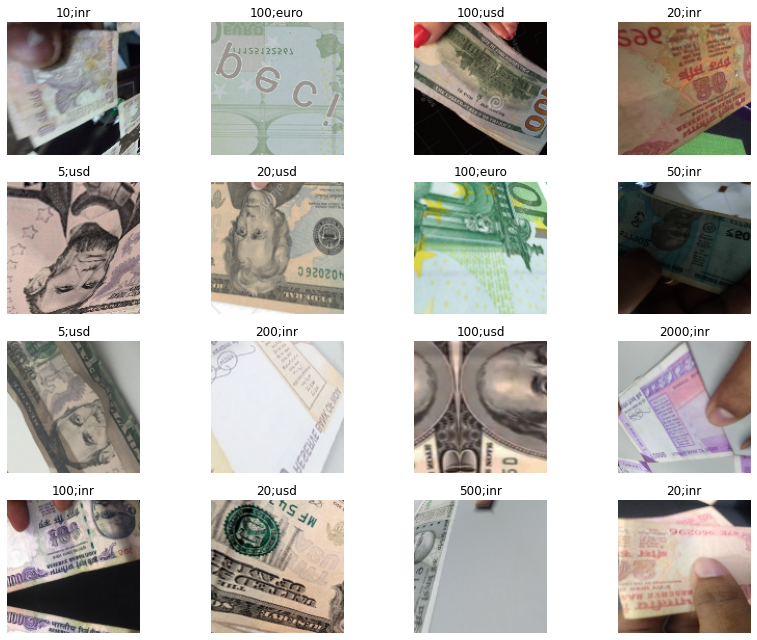

In [13]:
data.show_batch(rows=4, figsize=(12,9))

In [14]:
from functools import partial
from fastai.metrics import *
# create metrics
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
# create cnn with the resnet50 architecture
learn = cnn_learner(data, models.resnet50, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [15]:
learn.model_dir='/kaggle/working/'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


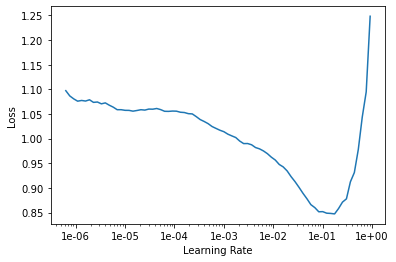

In [16]:
learn.lr_find()
learn.recorder.plot()

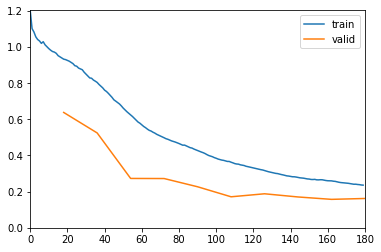

In [17]:
lr = 1e-2
learn.fit_one_cycle(10, slice(lr),callbacks=ShowGraph(learn))

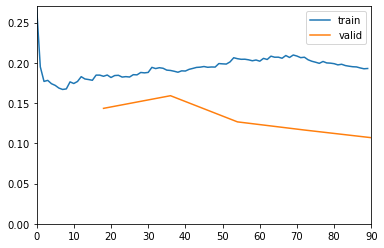

In [18]:
learn.fit_one_cycle(5, slice(lr),callbacks=ShowGraph(learn))

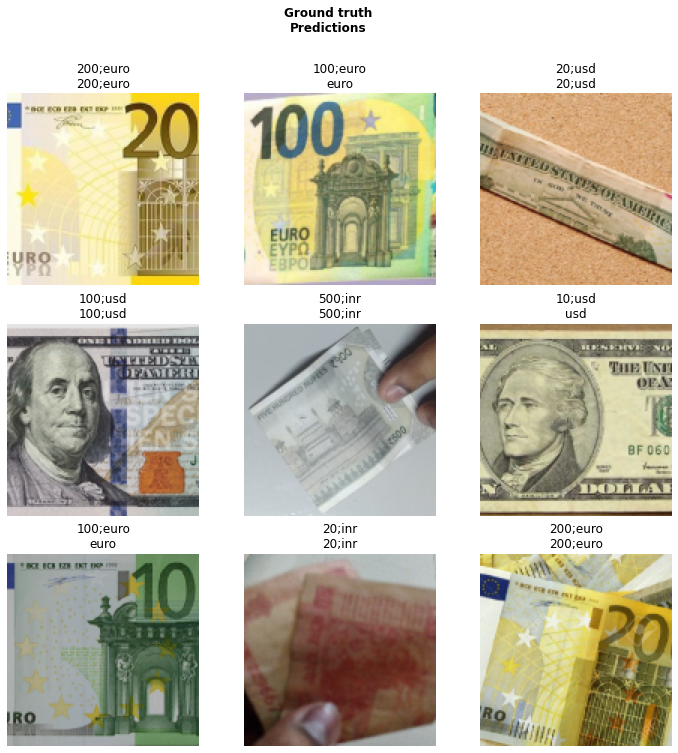

In [19]:
learn.show_results(rows=3)

In [20]:
learn.save('stage-1-rn50')

In [21]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


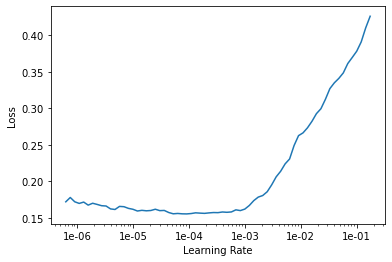

In [22]:
learn.lr_find()
learn.recorder.plot()

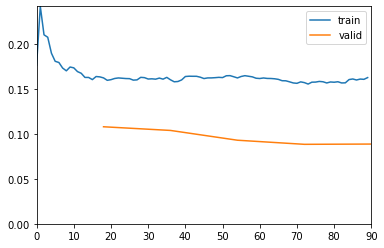

In [23]:
lr=1e-4
learn.fit_one_cycle(5, slice(1e-5, lr/5),callbacks=ShowGraph(learn))

In [24]:
learn.save('stage-2-rn50')

In [25]:
learn.load('stage-2-rn50');

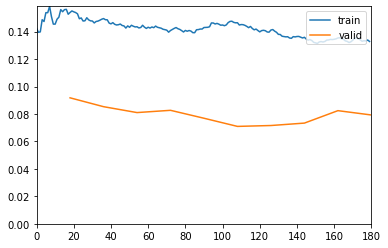

In [26]:
learn.fit_one_cycle(10, slice(1e-5, lr/5),callbacks=ShowGraph(learn))

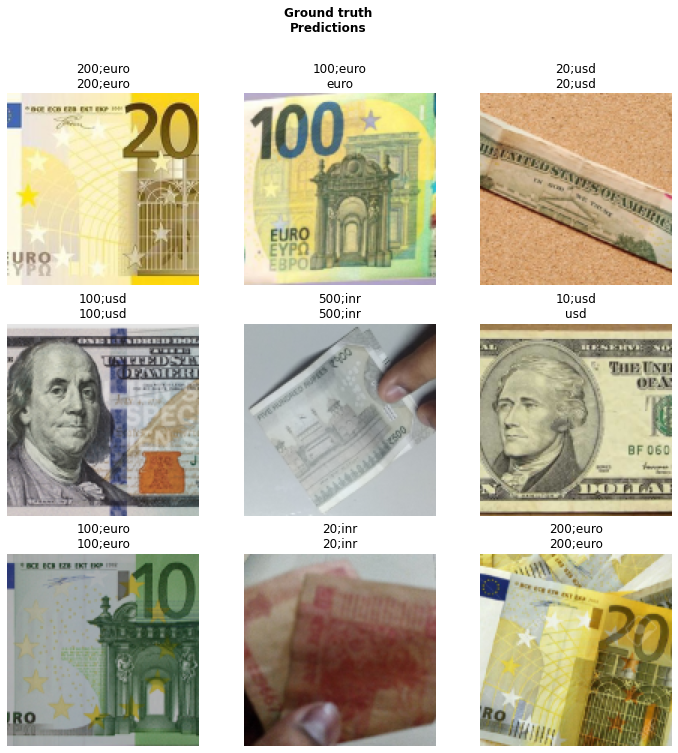

In [27]:
learn.show_results(rows=3)

In [28]:
learn.save('stage-3-rn50')

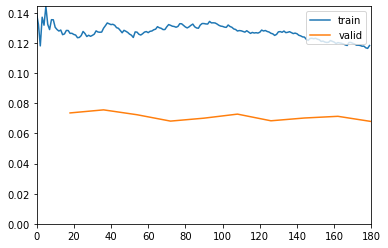

In [29]:
learn.fit_one_cycle(10, slice(1e-5, lr/5),callbacks=ShowGraph(learn))

In [30]:
gc.collect()
torch.cuda.empty_cache()

In [31]:
size,bs=256,10/4
data=get_data(size,bs)

In [32]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


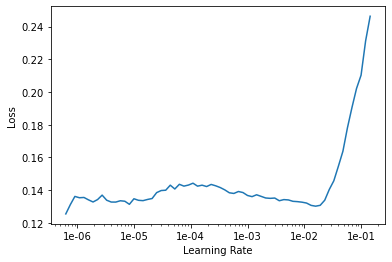

In [33]:
learn.lr_find()
learn.recorder.plot()

In [34]:
lr=1e-4

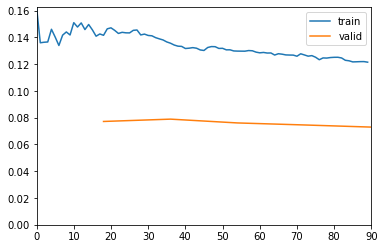

In [35]:
learn.fit_one_cycle(5, slice(lr),callbacks=ShowGraph(learn))

In [36]:
learn.save('stage-1-256-rn50')

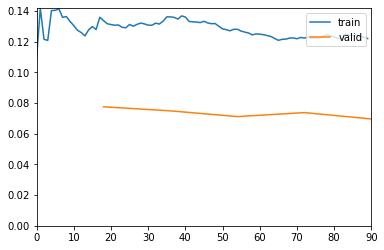

In [37]:
learn.fit_one_cycle(5, slice(lr),callbacks=ShowGraph(learn))

In [38]:
learn.save('stage-1-256-rn50')

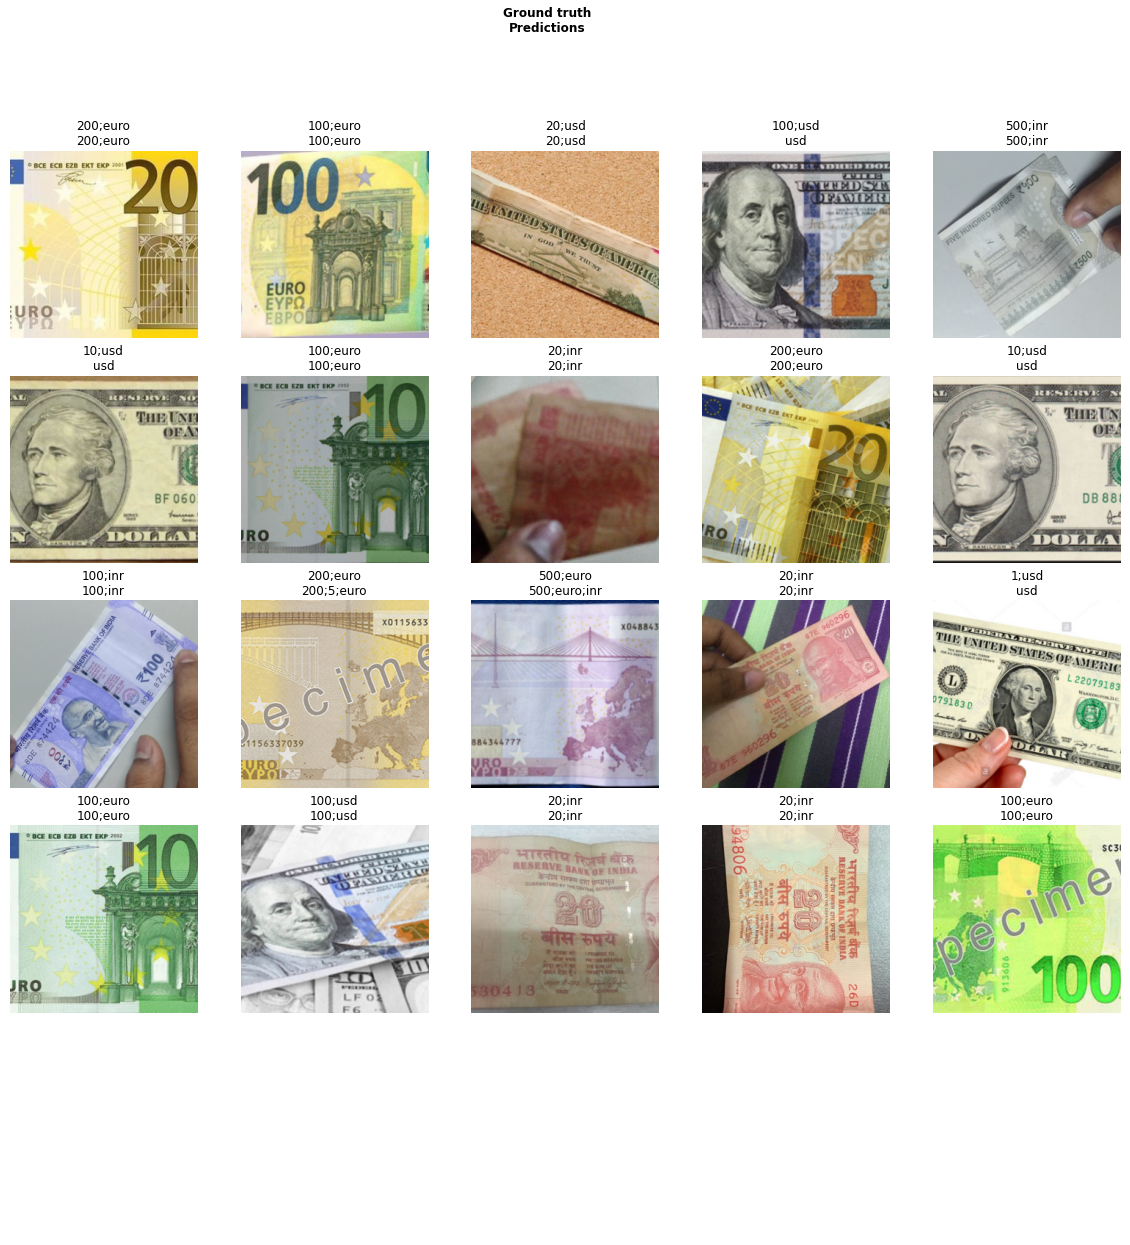

In [39]:
learn.show_results()

In [40]:
learn.unfreeze()

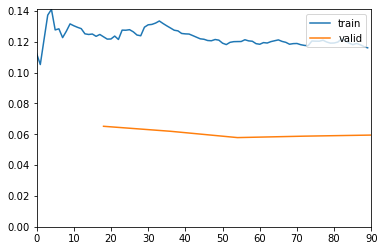

In [41]:
learn.fit_one_cycle(5, slice(1e-5, lr/5),callbacks=ShowGraph(learn))

In [42]:
learn.save('stage-2-256-rn50-fbeta9930')

In [43]:
learn.load('stage-2-256-rn50-fbeta9930');

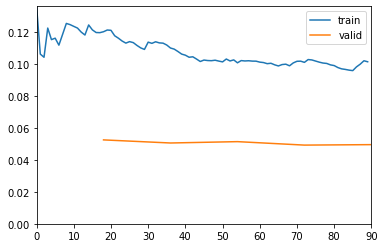

In [44]:
learn.fit_one_cycle(5, slice(1e-5, lr/5),callbacks=ShowGraph(learn))

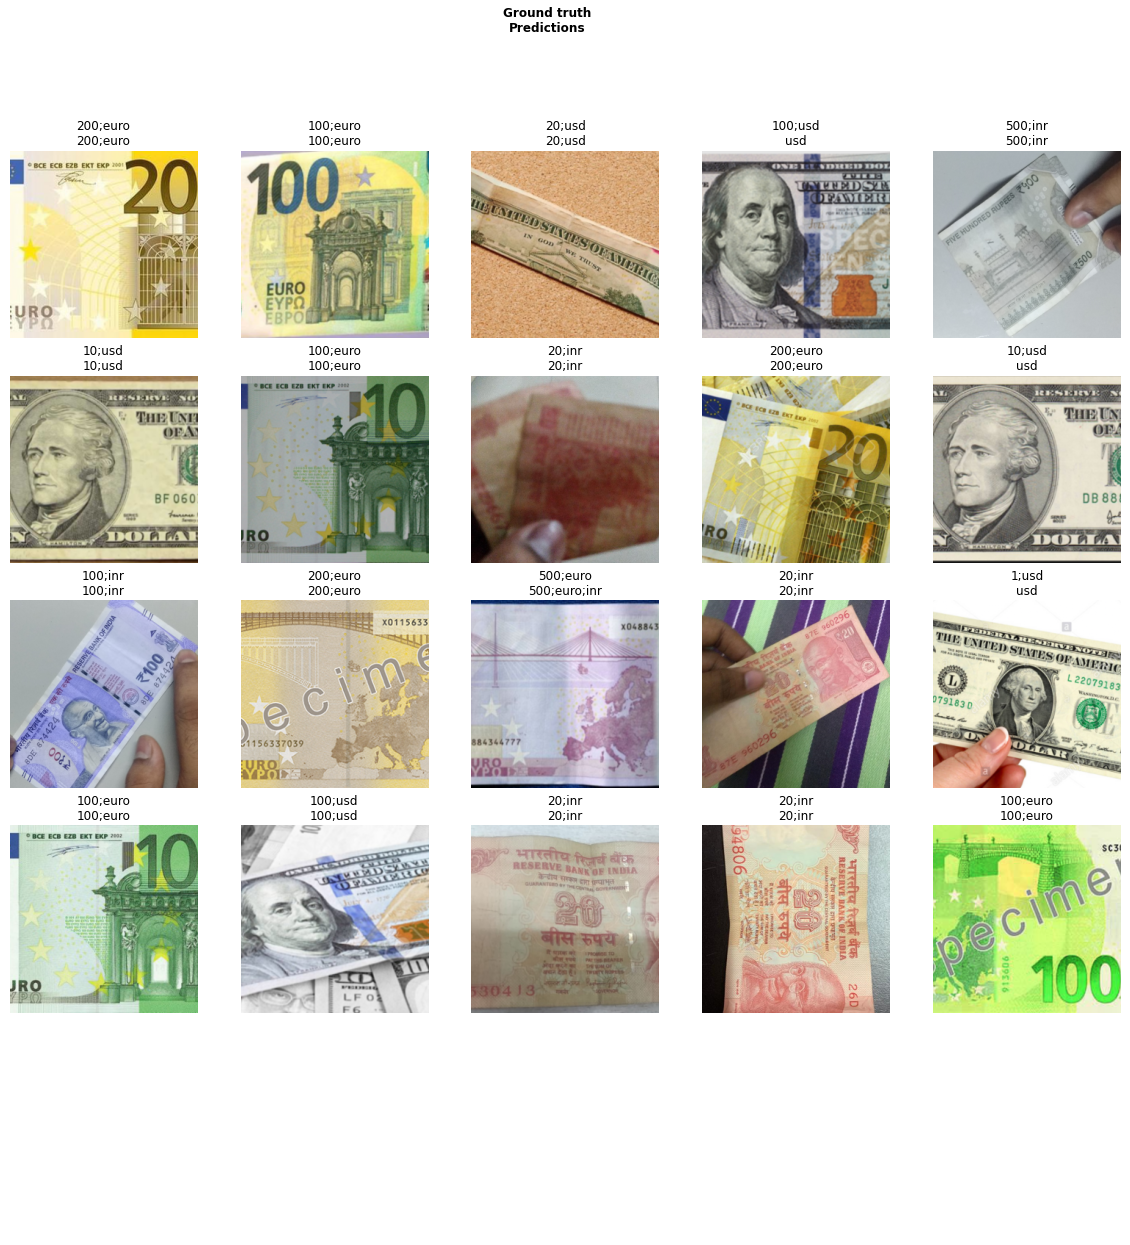

In [45]:
learn.show_results()

In [46]:
learn.save('multi-class')

In [47]:
imgPath=src.train.items[0]
img = open_image(imgPath)
pred=learn.predict(img)
probabilities=[ '%.2f' % float(100*elem) for elem in pred[2] ]
dict(zip(data.classes,probabilities))

{'1': '31.17',
 '10': '87.43',
 '100': '2.60',
 '20': '0.04',
 '200': '0.00',
 '2000': '0.12',
 '5': '0.17',
 '50': '0.33',
 '500': '0.02',
 'euro': '0.00',
 'inr': '0.10',
 'usd': '99.92'}

In [48]:
a=[b'1', b'10', b'100', b'20', b'200', b'2000' ,b'5', b'50', b'500', b'euro', b'inr',b'usd']
[c.decode("utf-8") for c in a]

['1', '10', '100', '20', '200', '2000', '5', '50', '500', 'euro', 'inr', 'usd']

In [49]:
learn.path=Path('/kaggle/working')

In [50]:
learn.export(file='multi-class.pkl')

In [51]:
path_img = Path('/kaggle/working/')
model_file = 'multi-class.pkl'
learn = load_learner( path_img , model_file )

In [52]:
model_file_jit = 'multi-class_jit.pth'
classes_file='classes.txt'
classes = ['1', '10', '100', '20', '200','2000' ,'5', '50', '500', 'euro','inr' ,'usd']

#trace_input = torch.ones(1,3,299,299).cuda()  #use this when on the GPU
trace_input = torch.ones(1,3,256,256)      #use this when on the CPU
jit_model = torch.jit.trace(learn.model.float(), trace_input)
output_path = str(path_img/f'{model_file_jit}')
torch.jit.save(jit_model, output_path)
# export classes text file
save_texts(path_img/'classes.txt', classes)
tar_file=path_img/'model.tar.gz'

# create a tarfile with the exported model and classes text file
with tarfile.open(tar_file, 'w:gz') as f:
    f.add(path_img/f'{model_file_jit}', arcname=model_file_jit)
    f.add(path_img/f'{classes_file}', arcname=classes_file)

In [53]:
#model
path_img = Path('/kaggle/working')
model_file_jit = 'multi-class_jit.pth'
classes = ['1', '10', '100', '20', '200','2000' , '5', '50', '500', 'euro', 'inr' ,'usd']
file =str(path_img/f'{model_file_jit}')
model = torch.jit.load(file, map_location=torch.device('cpu')).eval()  #cuda since we are on gpu | set cpu when we are on cpu

In [54]:
from IPython.display import Image

In [55]:
path_imgs=Path("/kaggle/input/testcurrency/euro-usd-inr-test-imgs/")
learn = load_learner("/kaggle/working/",file="multi-class.pkl" ,test=ImageList.from_folder(path_imgs,recurse=True))
preds,y = learn.get_preds(ds_type=DatasetType.Test)
preds[:6]

tensor([[4.9459e-05, 7.6333e-03, 1.4851e-03, 5.1733e-04, 9.6009e-05, 1.0846e-02,
         3.8352e-02, 3.9093e-04, 9.9926e-01, 9.9997e-01, 2.9598e-05, 6.4568e-05],
        [2.6769e-03, 1.3281e-02, 9.1763e-01, 7.1448e-04, 5.3133e-04, 1.3198e-01,
         8.2933e-04, 1.8370e-02, 2.9772e-02, 3.5744e-03, 9.9898e-01, 1.5204e-04],
        [3.6324e-05, 3.6599e-03, 3.6646e-03, 4.0288e-04, 5.9793e-04, 7.4005e-03,
         1.3352e-05, 2.5148e-03, 9.9908e-01, 3.4997e-05, 9.9999e-01, 1.1642e-05],
        [1.6298e-04, 3.6288e-04, 9.9283e-01, 3.4466e-04, 9.3708e-05, 5.6989e-05,
         1.3797e-02, 2.0509e-05, 4.7414e-03, 9.9982e-01, 1.4896e-04, 2.3272e-05],
        [5.8634e-02, 5.4417e-01, 5.9611e-02, 7.7867e-02, 2.7884e-03, 4.1211e-04,
         4.8169e-03, 5.0279e-02, 1.1818e-03, 4.6778e-06, 5.1356e-02, 9.9965e-01],
        [3.4174e-02, 9.6607e-02, 4.2791e-03, 1.6668e-01, 1.0012e-03, 4.8646e-04,
         2.4729e-03, 5.4611e-01, 1.1062e-04, 1.8613e-04, 1.3728e-02, 9.9506e-01]])

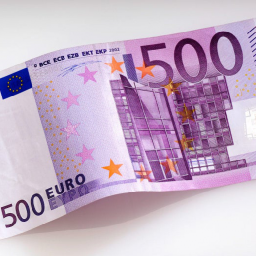

500 euro


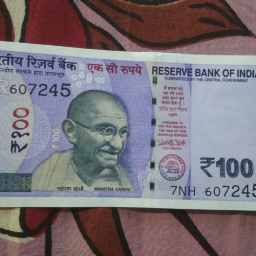

100 inr


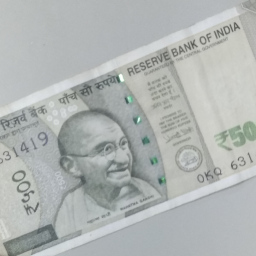

500 inr


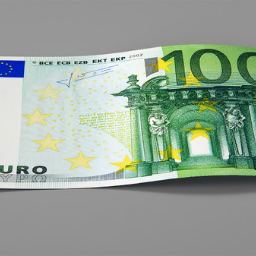

100 euro


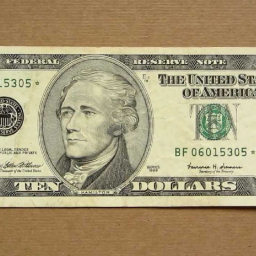

10 usd


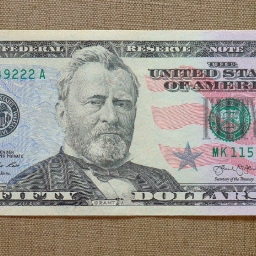

50 usd


In [56]:
for i in np.arange(6):
    item = learn.data.test_ds[i][0]
    display(item)
    pred=learn.predict(item)
    print(str(classes[torch.topk(pred[2],2)[1][1]])+" "+str(classes[torch.topk(pred[2],2)[1][0]]))

In [57]:
files=os.listdir("/kaggle/input/testcurrency/euro-usd-inr-test-imgs")
for f in files:
    print(f)

e2.jpeg
image (60).jpeg
IMG_20190718_211452.jpg
e1.jpg
d2.jpg
d1.jpg


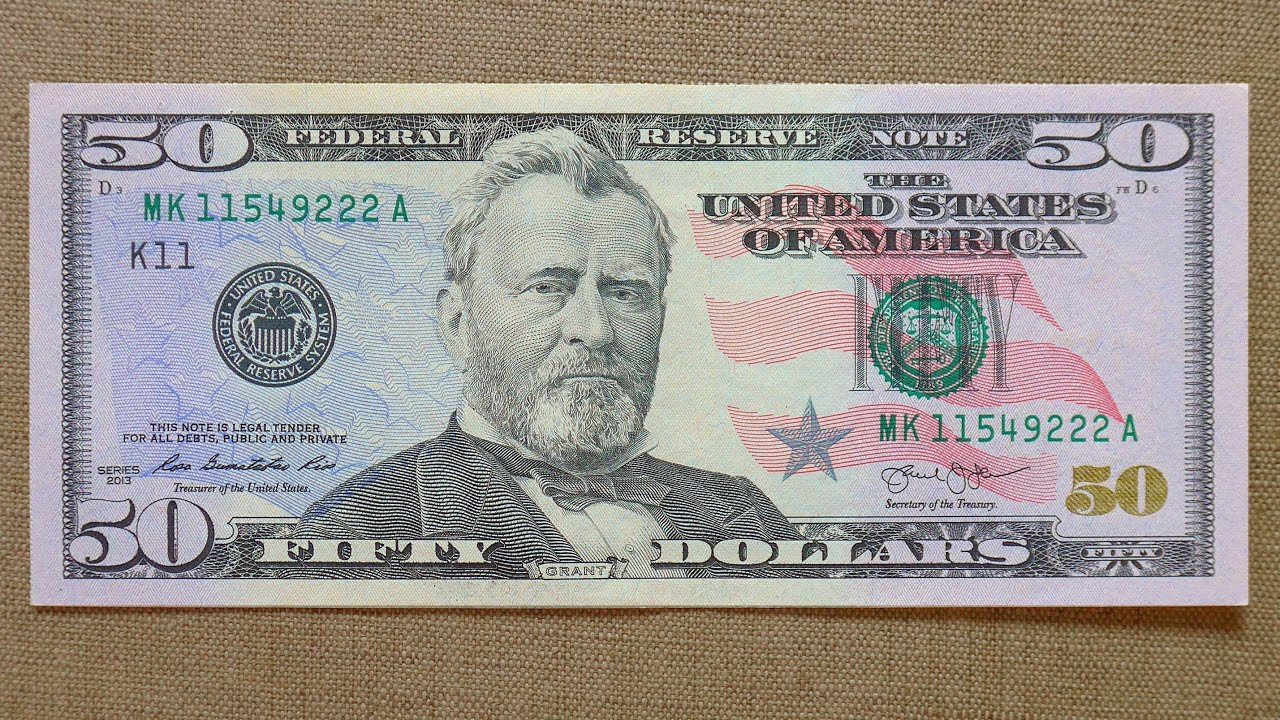

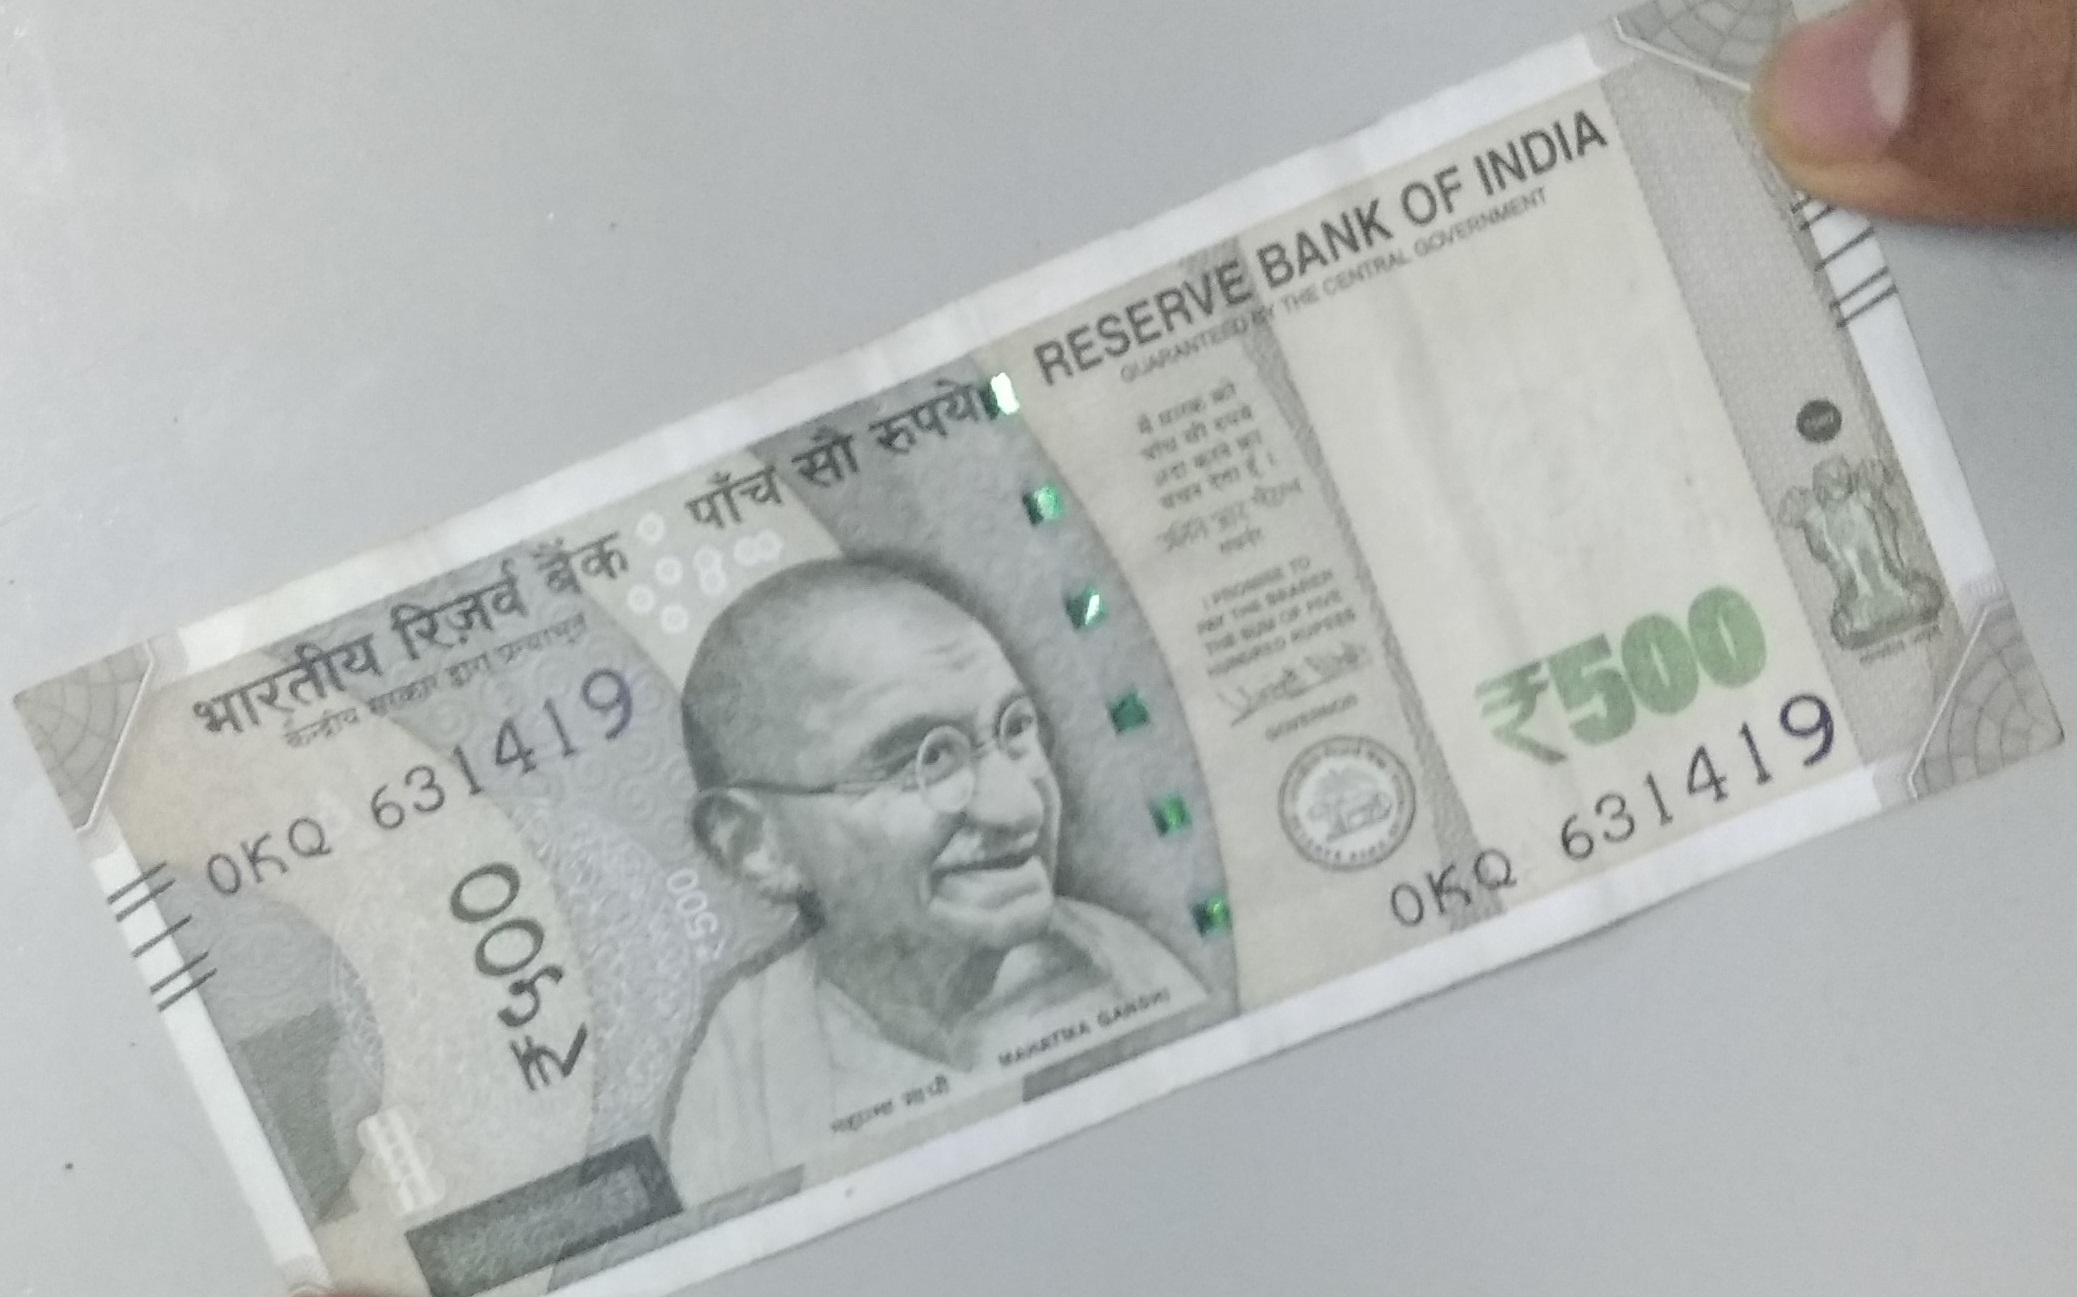

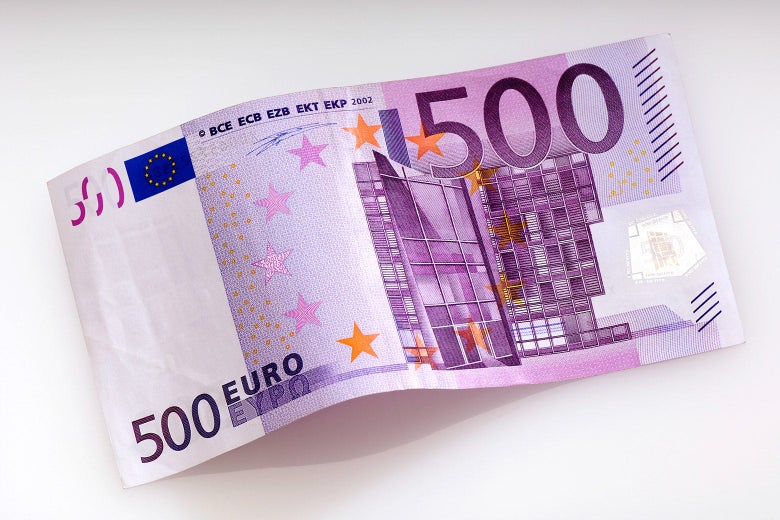

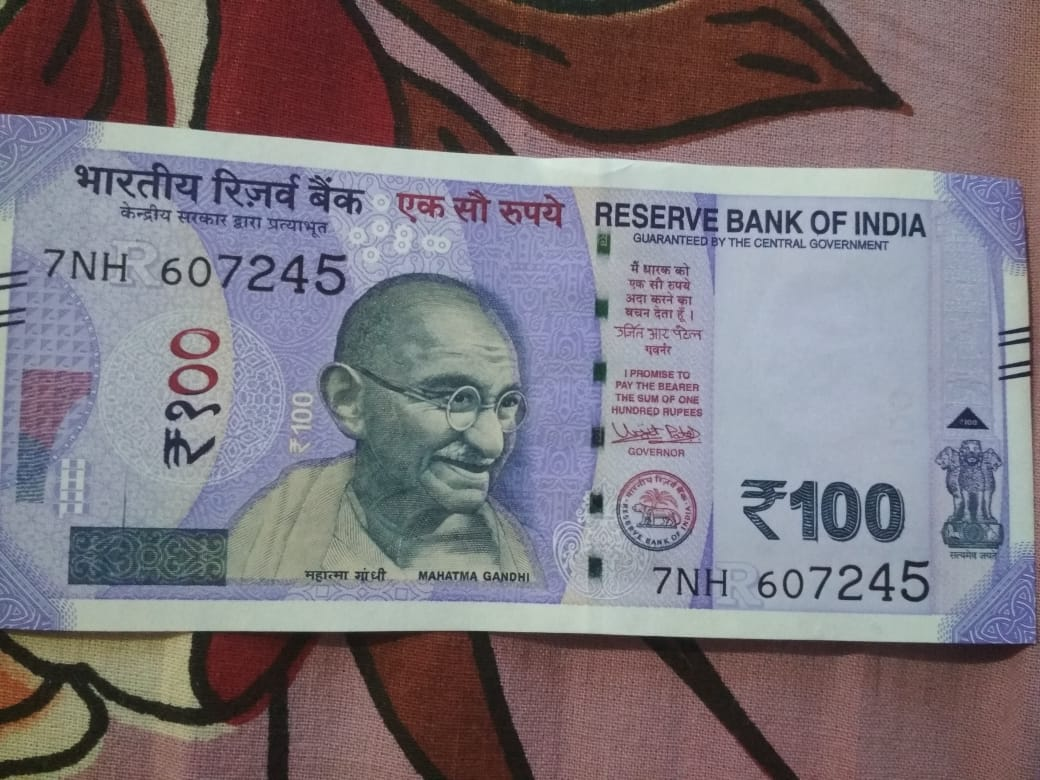

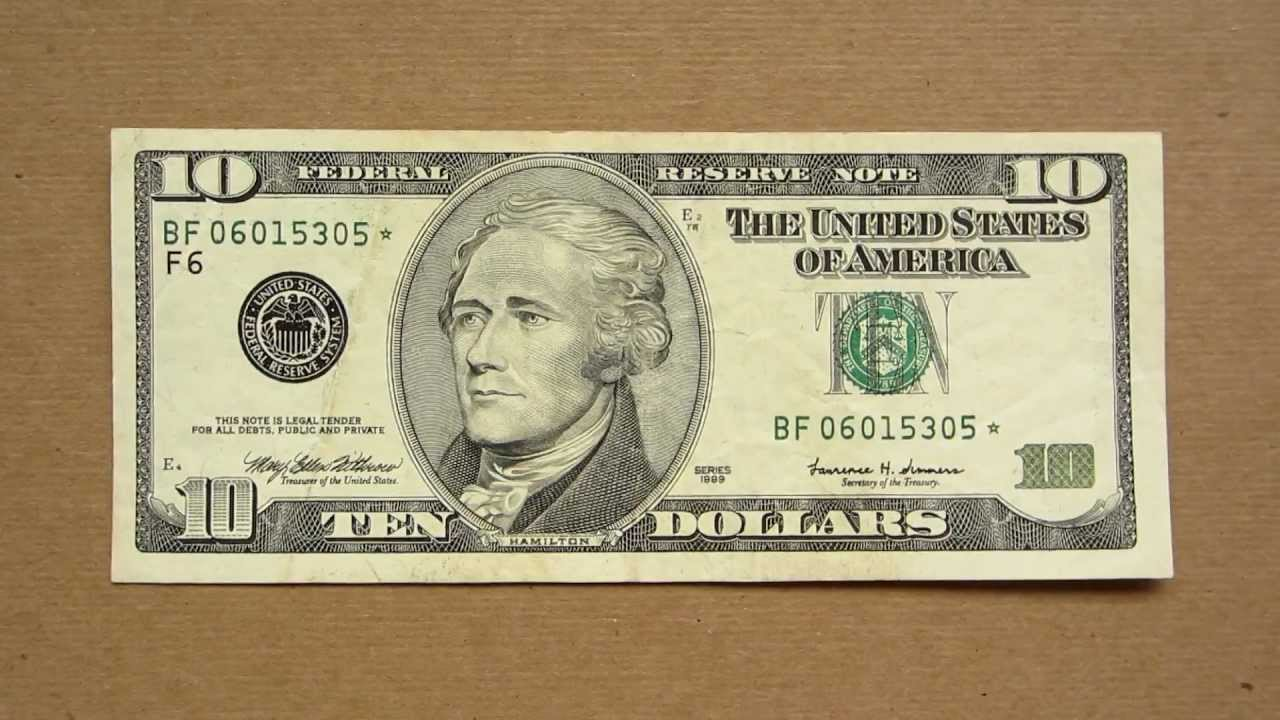

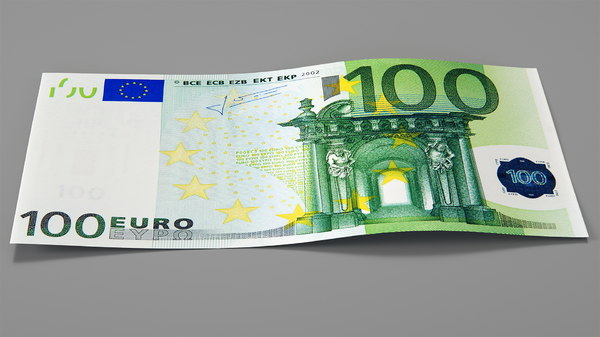

In [58]:
from random import shuffle
path_imgs = Path("/kaggle/input/testcurrency/euro-usd-inr-test-imgs/")
#path_imgs = Path("./docs/assets")
src = (ImageList.from_folder(path_imgs,recurse=True))
shuffle(src.items)

for i in np.arange(6):
    img=src.items[i]  #img is a path to the specific image file
    display(Image(img,width=200,height=200))
    

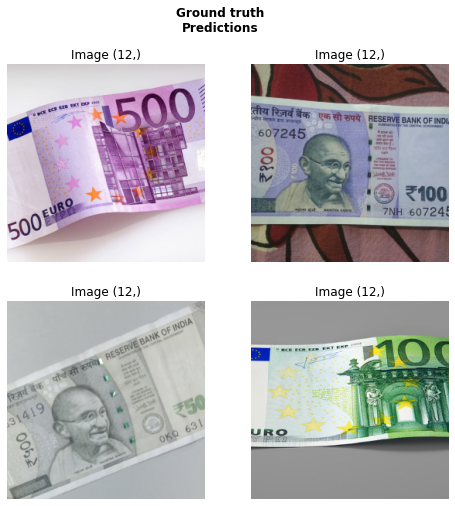

In [59]:
learn.show_results(ds_type=DatasetType.Test,rows=2)